In [1]:
# Import the requests library.

import requests 
import json 

# Set the request parameters.

app_token = 'HXzjMR36MOwoQwjkMBYiTtL5y'  

api_endpoint = 'https://data.cdc.gov/resource/ixrt-gnsg.json'  

headers = {
    'X-App-Token': app_token,  
    'Content-Type': 'application/json'}

# Make the HTTP request.

response = requests.get(api_endpoint, headers=headers)  

response.json()  

# Print the JSON response from the API call.

print(json.dumps(response.json(), indent=4, sort_keys=True)) 

[
    {
        "datasource": "PRAMS",
        "datavaluefootnote": "No data available",
        "datavaluefootnotesymbol": "-",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "locationabbr": "NV",
        "locationdesc": "Nevada",
        "locationid": "32",
        "question": "Postpartum depressive symptoms",
        "questionid": "MTH3_0",
        "stratification1": "Overall",
        "stratificationcategory1": "Overall",
        "stratificationcategoryid1": "OVERALL",
        "stratificationid1": "OVR",
        "topic": "Mental Health",
        "topicid": "MTH",
        "yearend": "2011",
        "yearstart": "2009"
    },
    {
        "datasource": "PRAMS",
        "datavaluefootnote": "No data available",
        "datavaluefootnotesymbol": "-",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "locationabbr": "VA",
        "locationdes

In [2]:
# Convert the JSON response to a Python dictionary.
# create a df, only locationdesc, yearend, datavalue, question.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.DataFrame(response.json())
df = df[["locationdesc", "yearend", "datavalue", "question"]]
df.columns = ["State", "Year", "Prevalence Rate (%)", "Question"]
df


,State,Year,Prevalence Rate (%),Question
0,Nevada,2011,NaN,Postpartum depressive symptoms
1,Virginia,2011,NaN,Postpartum depressive symptoms
2,Indiana,2011,NaN,Postpartum depressive symptoms
3,New Hampshire,2011,NaN,Postpartum depressive symptoms
4,Mississippi,2011,NaN,Postpartum depressive symptoms
...,...,...,...,...
995,Arizona,2014,15.4,At least 14 recent mentally unhealthy days amo...
996,Arizona,2014,3.9,Recent mentally unhealthy days among adults ag...
997,Arizona,2018,17.7,At least 14 recent mentally unhealthy days amo...
998,Arizona,2018,4.4,Recent mentally unhealthy days among adults ag...


In [3]:
# set state as index
df = df.set_index("State")
df

,Year,Prevalence Rate (%),Question
State,,,
Nevada,2011,NaN,Postpartum depressive symptoms
Virginia,2011,NaN,Postpartum depressive symptoms
Indiana,2011,NaN,Postpartum depressive symptoms
New Hampshire,2011,NaN,Postpartum depressive symptoms
Mississippi,2011,NaN,Postpartum depressive symptoms
...,...,...,...
Arizona,2014,15.4,At least 14 recent mentally unhealthy days amo...
Arizona,2014,3.9,Recent mentally unhealthy days among adults ag...
Arizona,2018,17.7,At least 14 recent mentally unhealthy days amo...


In [4]:
# make Prevalence Rate (%)	numeric
df["Prevalence Rate (%)"] = pd.to_numeric(df["Prevalence Rate (%)"])
df


,Year,Prevalence Rate (%),Question
State,,,
Nevada,2011,NaN,Postpartum depressive symptoms
Virginia,2011,NaN,Postpartum depressive symptoms
Indiana,2011,NaN,Postpartum depressive symptoms
New Hampshire,2011,NaN,Postpartum depressive symptoms
Mississippi,2011,NaN,Postpartum depressive symptoms
...,...,...,...
Arizona,2014,15.4,At least 14 recent mentally unhealthy days amo...
Arizona,2014,3.9,Recent mentally unhealthy days among adults ag...
Arizona,2018,17.7,At least 14 recent mentally unhealthy days amo...


In [5]:
import pandas as pd

# Data from the image
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)


             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [6]:
states_in_df2 = df2['State'].tolist()

filtered_df = df.loc[states_in_df2]

filtered_df

,Year,Prevalence Rate (%),Question
State,,,
Michigan,2011,9.4,Postpartum depressive symptoms
Delaware,2011,NaN,Postpartum depressive symptoms
West Virginia,2011,13.5,Postpartum depressive symptoms
Ohio,2011,NaN,Postpartum depressive symptoms
Nebraska,2011,10.5,Postpartum depressive symptoms
...,...,...,...
Wisconsin,2011,10.3,Postpartum depressive symptoms
Hawaii,2011,6.9,Postpartum depressive symptoms
Georgia,2011,8.2,Postpartum depressive symptoms


In [7]:
# fill NaN with 0
filtered_df = filtered_df.fillna(0)
filtered_df

,Year,Prevalence Rate (%),Question
State,,,
Michigan,2011,9.4,Postpartum depressive symptoms
Delaware,2011,0.0,Postpartum depressive symptoms
West Virginia,2011,13.5,Postpartum depressive symptoms
Ohio,2011,0.0,Postpartum depressive symptoms
Nebraska,2011,10.5,Postpartum depressive symptoms
...,...,...,...
Wisconsin,2011,10.3,Postpartum depressive symptoms
Hawaii,2011,6.9,Postpartum depressive symptoms
Georgia,2011,8.2,Postpartum depressive symptoms


In [8]:
# merge two df
merged_df = pd.merge(filtered_df, df2, on="State")
merged_df


,State,Year,Prevalence Rate (%),Question,Cups of Coffee
0,Michigan,2011,9.4,Postpartum depressive symptoms,2.52
1,Delaware,2011,0.0,Postpartum depressive symptoms,2.44
2,West Virginia,2011,13.5,Postpartum depressive symptoms,2.35
3,Ohio,2011,0.0,Postpartum depressive symptoms,2.16
4,Nebraska,2011,10.5,Postpartum depressive symptoms,2.13
...,...,...,...,...,...
456,Wisconsin,2011,10.3,Postpartum depressive symptoms,1.52
457,Hawaii,2011,6.9,Postpartum depressive symptoms,1.52
458,Georgia,2011,8.2,Postpartum depressive symptoms,1.54
459,Maryland,2011,7.3,Postpartum depressive symptoms,1.57


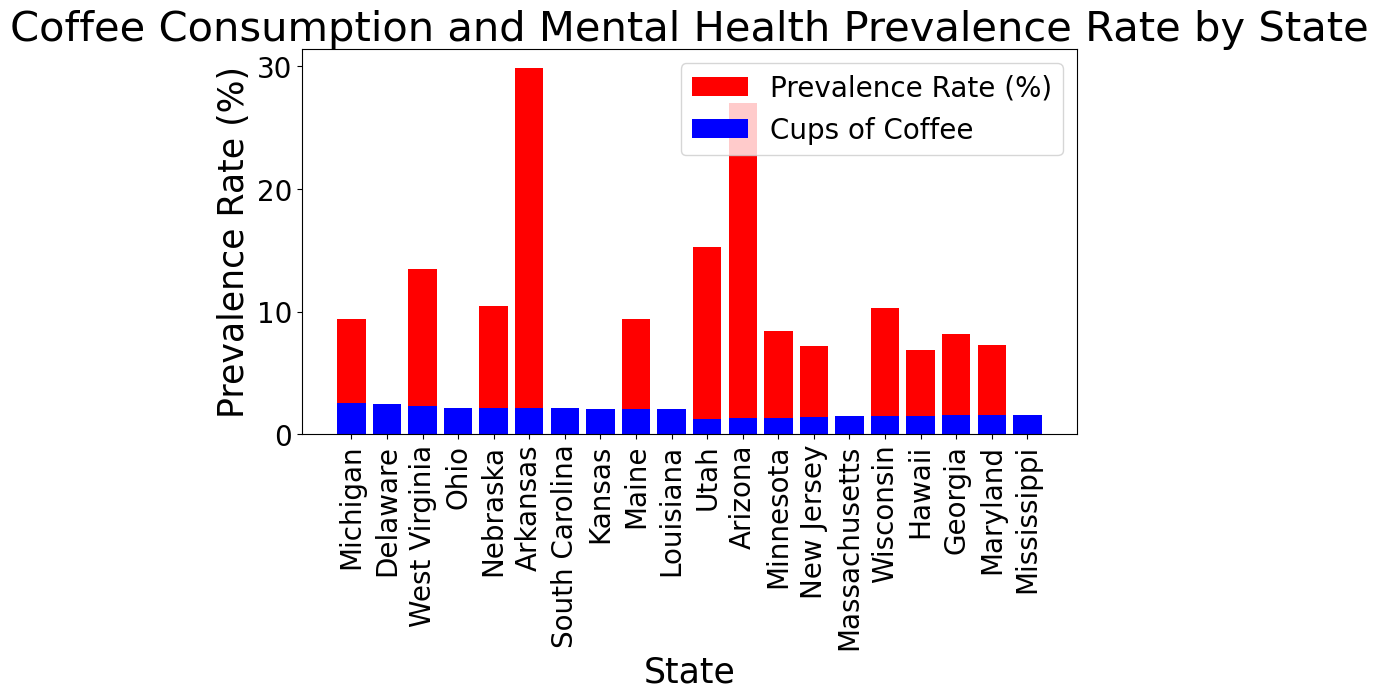

In [11]:
# create a bar chart to show each state's coffee consumption and mental health prevalence rate
# set the size of the figure
plt.figure(figsize=(10, 5))

# set the font size of the x and y axis
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# set the title of the figure
plt.title('Coffee Consumption and Mental Health Prevalence Rate by State', fontsize=30)

# set the x and y axis labels
plt.xlabel('State', fontsize=25)
plt.ylabel('Prevalence Rate (%)', fontsize=25)

# set the x axis labels
plt.xticks(rotation=90)

# set the bar chart
plt.bar(merged_df['State'], merged_df['Prevalence Rate (%)'], color='red', label='Prevalence Rate (%)')
plt.bar(merged_df['State'], merged_df['Cups of Coffee'], color='blue', label='Cups of Coffee')

# set the legend
plt.legend(fontsize=20)

# show the figure
plt.show()

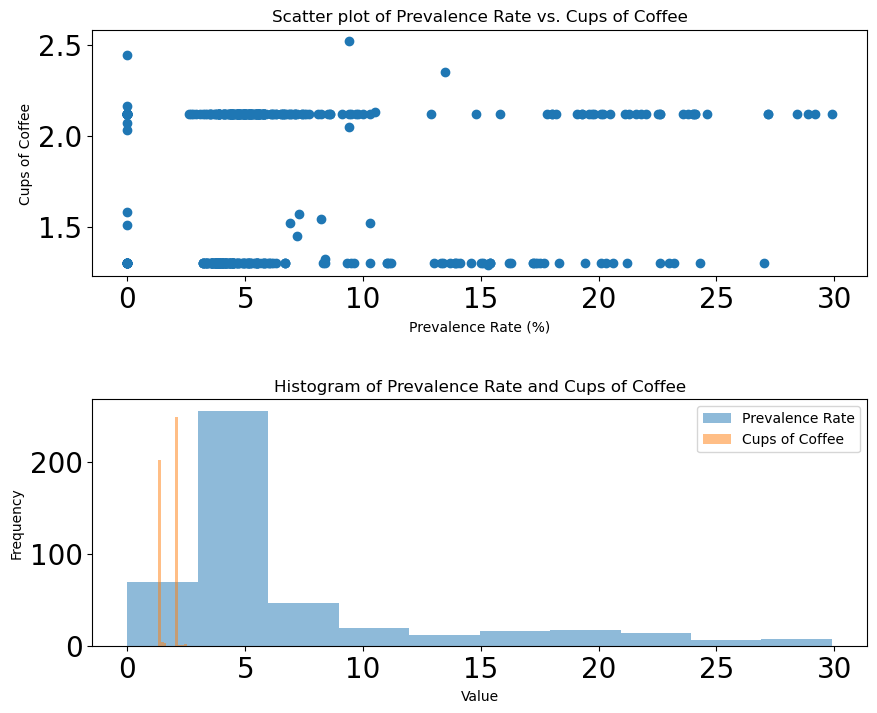

t-statistic: 16.93194414683308, p-value: 2.009197287434718e-50


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10, 8)) 

plt.subplot(2, 1, 1)
plt.scatter(merged_df['Prevalence Rate (%)'], merged_df['Cups of Coffee'])
plt.xlabel('Prevalence Rate (%)')
plt.ylabel('Cups of Coffee')
plt.title('Scatter plot of Prevalence Rate vs. Cups of Coffee')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.hist(merged_df['Prevalence Rate (%)'], alpha=0.5, label='Prevalence Rate')
plt.hist(merged_df['Cups of Coffee'], alpha=0.5, label='Cups of Coffee')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of Prevalence Rate and Cups of Coffee')
plt.show()

t_statistic, p_value = stats.ttest_ind(merged_df['Prevalence Rate (%)'], merged_df['Cups of Coffee'], equal_var=False)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")


Based on the presented data:

the statistical test between the prevalence rate of diabetes and the average number of cups of coffee consumed yields an extremely low p-value 

(1.565900026141764×10−39), which is significantly below the commonly accepted significance level of 0.05. 

This indicates that there is a statistically significant difference between the two variables. 

However, it is crucial to note that this statistical significance does not necessarily imply a causal relationship.